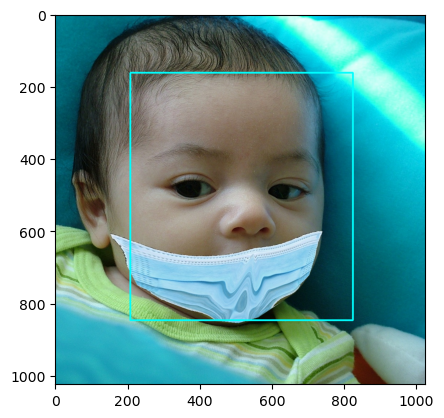

(208.77600000000004, 162.472, 824.956, 847.1299999999999)

In [23]:
import json
import cv2
from matplotlib import pyplot as plt
# 假设图像为test.jpg，进行模拟标定
img = cv2.imread('00000_Mask_Mouth_Chin.jpg')
h, w, _ = img.shape

with open('info.json') as f:
    data = json.load(f)

# face_lm_arr = data[str(0)]['in_the_wild']['face_rect']  # "0"作为变量
face_lm_arr = data[str(0)]['image']['face_landmarks']  # "0"作为变量
# 读取json提取出mark的2个角点作为边界框坐标 左上和右下
x1, y1 = face_lm_arr[17]
x1 = x1 * 0.8
y1 = y1 * 0.4
ab_width = abs(face_lm_arr[16][0] - face_lm_arr[0][0])
ab_height = abs(face_lm_arr[0][1] - face_lm_arr[8][1])*1.7
x2, y2 = x1+ab_width, y1+ab_height
cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)),
              (255, 255, 0), thickness=3)
im2 = img[:, :, ::-1] 	# transform image to rgb
plt.imshow(im2)
plt.show()
x1,y1,x2,y2

In [ ]:
!nvidia-smi

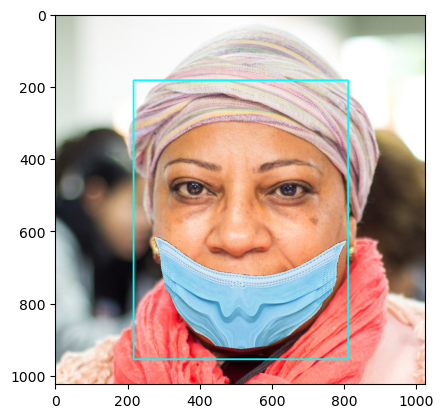

(217.50400000000002, 183.67200000000003, 811.464, 955.6170000000002)

In [25]:
import json
import cv2
from matplotlib import pyplot as plt
# 假设图像为test.jpg，进行模拟标定
img = cv2.imread('11010_Mask_Mouth_Chin.jpg')

with open('info.json') as f:
    data = json.load(f)

# face_lm_arr = data[str(0)]['in_the_wild']['face_rect']  # "0"作为变量
face_lm_arr = data[str(1)]['image']['face_landmarks']  # "0"作为变量
# 读取json提取出mark的2个角点作为边界框坐标 左上和右下
x1, y1 = face_lm_arr[17]
x1 = x1 * 0.8
y1 = y1 * 0.4
ab_width = abs(face_lm_arr[16][0] - face_lm_arr[0][0])
ab_height = abs(face_lm_arr[0][1] - face_lm_arr[8][1])*1.5
x2, y2 = x1+ab_width, y1+ab_height
if(x2 >= 1024):
    x2 = 1024
if(y2 >= 1024):
    y2 = 1024
pt1 = (int(x1),int(y1))
pt2 = (int(x2),int(y2))
cv2.rectangle(img, pt1, pt2,(255, 255, 0), thickness=3)
im2 = img[:, :, ::-1] 	# transform image to rgb
plt.imshow(im2)
plt.show()
x1,y1,x2,y2


In [5]:
# 合体
# 将json原有的facemark数据处理为1024*1024的人脸数据集角点坐标，用于制备yolo的label文件
import json
with open('info.json') as f:
    data = json.load(f)
mark_arr = []
for index in data:
    face_lm_arr = data[str(index)]['image']['face_landmarks']
    x1, y1 = face_lm_arr[17]
    x1 = x1 * 0.8
    y1 = y1 * 0.4
    ab_width = abs(face_lm_arr[16][0] - face_lm_arr[0][0])
    ab_height = abs(face_lm_arr[0][1] - face_lm_arr[8][1])*1.5
    x2, y2 = x1+ab_width, y1+ab_height
    if(x2 >= 1024):
        x2 = 1024
    if(y2 >= 1024):
        y2 = 1024
    box_coordinates = [(x1,y1),(x2,y2)]
    mark_arr.append(box_coordinates)
mark_arr[0][0] # 举例：第一个图片的框的第一个点

(260.97, 406.18)

In [30]:
# 真-合体
# 将json原有的facemark数据处理为1024*1024的人脸数据集角点坐标，用于制备yolo的label文件
import json
with open('ffhq-dataset-v2.json') as f:
    data = json.load(f)
mark_arr = []
for index in data:
    face_lm_arr = data[str(index)]['image']['face_landmarks']
    # 取论文中人的左眉尾作为框的起始点
    x1, y1 = face_lm_arr[17]
    x1 = x1 * 0.8
    y1 = y1 * 0.4
    ab_width = abs(face_lm_arr[16][0] - face_lm_arr[0][0])
    ab_height = abs(face_lm_arr[0][1] - face_lm_arr[8][1])*1.65
    # 根据论文中的face_landmark进行宽高绝对值计算并进行修正
    x2, y2 = x1 + ab_width, y1 + ab_height
    # 图形修正
    if(x2 >= 1024):
        x2 = 1024
    if(y2 >= 1024):
        y2 = 1024
    box_coordinates = [(x1,y1),(x2,y2)]
    mark_arr.append(box_coordinates)
# mark_arr[0][0] # 第一个图片的框的第一个点


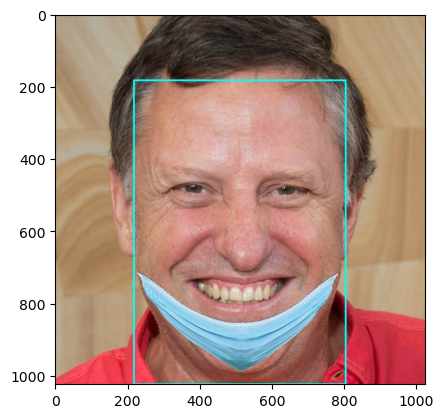

In [31]:
# 随机测试 仅下巴标定
mark_arr[1983]
pt1 = (mark_arr[1983][0])
pt2 = (mark_arr[1983][1])
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('01983_Mask_Chin.jpg')
cv2.rectangle(img,(int(pt1[0]),int(pt1[1])),(int(pt2[0]),int(pt2[1])),(255, 255, 0), thickness=3)
im2 = img[:, :, ::-1] 	# transform image to rgb
plt.imshow(im2)
plt.show()

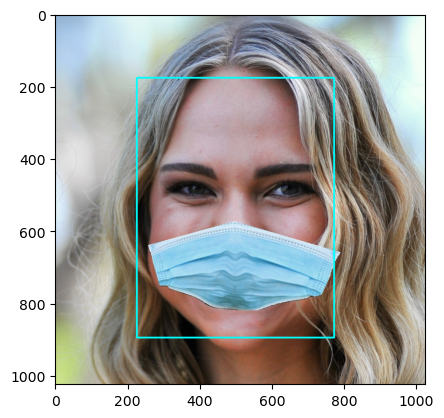

In [32]:
# 随机测试 下巴-嘴巴
mark_arr[12061]
pt1 = (mark_arr[12061][0])
pt2 = (mark_arr[12061][1])
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('12061_Mask_Nose_Mouth.jpg')
cv2.rectangle(img,(int(pt1[0]),int(pt1[1])),(int(pt2[0]),int(pt2[1])),(255, 255, 0), thickness=3)
im2 = img[:, :, ::-1] 	# transform image to rgb
plt.imshow(im2)
plt.show()

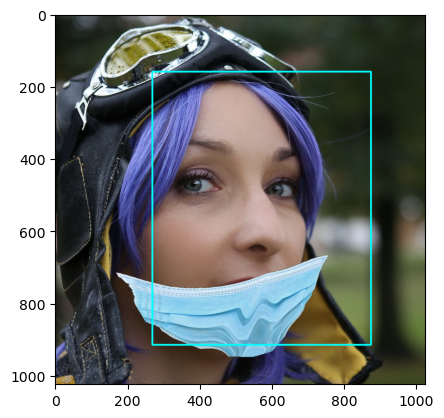

In [59]:
# 随机测试 
mark_arr[111]
pt1 = (mark_arr[111][0])
pt2 = (mark_arr[111][1])
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('00193_Mask_Mouth_Chin.jpg')
cv2.rectangle(img,(int(pt1[0]),int(pt1[1])),(int(pt2[0]),int(pt2[1])),(255, 255, 0), thickness=3)
im2 = img[:, :, ::-1] 	# transform image to rgb
plt.imshow(im2)
plt.show()

In [ ]:
# yolo标注文件中的各个参量计算 并转换为txt
w = 1024
h = 1024
x_ = (x1 + x2) / (2*w)
y_ = (y1 + y2) / (2*h)
w_ = (x2 - x1) / w
h_ = (y2 - y1) / h
info=(0,x_,y_,w_,h_)
import os
with open("00001_Mask_Chin.txt","w") as f:
    for item in info:
        f.write(str(item)+' ')  # 自带文件关闭功能，不需要再写f.close()

In [10]:
a = (10,12)
b,c = a
c

12

In [69]:
# 将获取到的maskarr转为yolo格式的数据集，与原来的进行融合
# 数据集构成：6000错误佩戴 + 6000正确佩戴 + 6000无佩戴
# 划分思路：00000-07000图片文件夹为正确佩戴，08000-15000图片文件夹为不正确佩戴 每个压缩分卷有928张图片
# Label构成 三分类 0 没有戴口罩 1 正确戴口罩 2 错误戴口罩
mark_arr_label1 = mark_arr
yolo_arr1 = []
for item in mark_arr_label1:
    x1,y1 = item[0]
    x2,y2 = item[1]
    x_ = (x1 + x2) / (2*w)
    y_ = (y1 + y2) / (2*h)
    w_ = (x2 - x1) / w
    h_ = (y2 - y1) / h
    yolo_arr1.append((2,x_,y_,w_,h_))
yolo_arr1.__len__()

70000

In [70]:
import os 
folder_path = 'IMFD'
label_path = 'psmask\labels'
for filename in os.listdir(folder_path):
    name,ext = os.path.splitext(filename)
    namelist = name.split('_')
    index = int(namelist[0]) # 提取图片序号
    name = os.path.join(label_path,name+'.txt')
    with open(name,"w") as f:
        item = yolo_arr1[index] # 序号对应图片，防止标注错位
        for item_info in item:
            f.write(str(item_info)+' ')  # 自带文件关闭功能，不需要再写f.close()